In [ ]:
QUESTION 1

In [4]:
import pandas as pd

# Step 2. Import the dataset from this address.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

# Step 4. Discover what is the mean age per occupation
mean_age_by_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_by_occupation)

# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

users['gender_numeric'] = users['gender'].apply(gender_to_numeric)
male_ratio_by_occupation = users.groupby('occupation')['gender_numeric'].mean()
male_ratio_by_occupation.sort_values(ascending=False, inplace=True)
print(male_ratio_by_occupation)

# Step 6. For each occupation, calculate the minimum and maximum ages
min_max_age_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age_by_occupation)

# Step 7. For each combination of occupation and sex, calculate the mean age
mean_age_by_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_by_occupation_sex)

# Step 8. For each occupation present the percentage of women and men
total_by_occupation = users.groupby('occupation')['gender'].count()
male_by_occupation = users[users['gender'] == 'M'].groupby('occupation')['gender'].count()
female_by_occupation = users[users['gender'] == 'F'].groupby('occupation')['gender'].count()
male_percentage_by_occupation = (male_by_occupation / total_by_occupation) * 100
female_percentage_by_occupation = (female_by_occupation / total_by_occupation) * 100
percentage_by_occupation = pd.concat([male_percentage_by_occupation, female_percentage_by_occupation], axis=1)
percentage_by_occupation.columns = ['Male %', 'Female %']
print(percentage_by_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.57

In [ ]:
QUESTION 2

In [5]:
import pandas as pd

# Step 2. Import the dataset from this address
url = 'https://raw.githubusercontent.com/jokecamp/FootballData/master/Euro%202012/Euro%202012%20stats%20TEAM.csv'
euro12 = pd.read_csv(url)

# Step 4. Select only the Goal column
goals = euro12['Goals']
print(goals)

# Step 5. How many team participated in the Euro2012?
num_teams = euro12['Team'].nunique()
print(num_teams)

# Step 6. What is the number of columns in the dataset?
num_columns = euro12.shape[1]
print(num_columns)

# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

# Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(discipline_sorted)

# Step 9. Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print(mean_yellow_cards)

# Step 10. Filter teams that scored more than 6 goals
high_scoring_teams = euro12[euro12['Goals'] > 6]
print(high_scoring_teams)

# Step 11. Select the teams that start with G
g_teams = euro12[euro12['Team'].str.startswith('G')]
print(g_teams)

# Step 12. Select the first 7 columns
first_seven_cols = euro12.iloc[:, :7]
print(first_seven_cols)

# Step 13. Select all columns except the last 3
all_except_last_three_cols = euro12.iloc[:, :-3]
print(all_except_last_three_cols)

# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
eng_ita_rus_shooting_acc = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print(eng_ita_rus_shooting_acc)

HTTPError: HTTP Error 404: Not Found

In [ ]:
QUESTION 3

In [9]:
import pandas as pd
import numpy as np

# Create a DataFrame with housing data
data = {'bedrooms': np.random.randint(1, 5, size=10),
        'bathrooms': np.random.randint(1, 4, size=10),
        'price': np.random.randint(100000, 500001, size=10)}
df = pd.DataFrame(data)

# Add a new column for price per square foot
df['price_per_sqft'] = df['price'] / 1500

# Add a new column for total rooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Sort the DataFrame by price
df = df.sort_values('price')

# Reset the index
df = df.reset_index(drop=True)

# Print the DataFrame
print(df)


   bedrooms  bathrooms   price  price_per_sqft  total_rooms
0         2          2  123495       82.330000            4
1         1          3  124474       82.982667            4
2         3          1  174534      116.356000            4
3         2          2  223517      149.011333            4
4         2          1  301586      201.057333            3
5         3          3  347756      231.837333            6
6         2          3  398027      265.351333            5
7         1          3  400492      266.994667            4
8         4          2  426971      284.647333            6
9         4          1  465271      310.180667            5


In [ ]:
QUESTION 4

In [10]:
# Step 1
import pandas as pd
import numpy as np

# Step 2
data = pd.read_csv('wind.txt', delim_whitespace=True, na_values='NaN')

# Step 3
data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']])
data = data.drop(columns=['Yr', 'Mo', 'Dy']).set_index('date')

# Step 4
def fix_century(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.Timestamp(year=year, month=x.month, day=x.day)

data.index = data.index.map(fix_century)

# Step 5
data.index = pd.to_datetime(data.index, format='%y-%m-%d')

# Step 6
print("Number of missing values in each location:\n", data.isnull().sum())

# Step 7
print("Number of non-missing values in the dataset:", data.notnull().sum().sum())

# Step 8
mean_windspeed = data.mean().mean()
print("Mean windspeed for the entire dataset:", mean_windspeed)

# Step 9
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

print("Location stats:\n", loc_stats)

# Step 10
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

print("Day stats:\n", day_stats)

# Step 11
january_data = data[data.index.month == 1]
january_mean = january_data.mean()
print("January mean windspeed for each location:\n", january_mean)

# Step 12
yearly_data = data.resample('Y').mean()
print("Yearly data:\n", yearly_data)

# Step 13
monthly_data = data.resample('M').mean()
print("Monthly data:\n", monthly_data)

# Step 14
weekly_data = data.resample('W').mean()
print("Weekly data:\n", weekly_data)

# Step 15
weekly_stats = pd.DataFrame()
weekly_stats['min'] = weekly_data.head(52).min(axis=1)
weekly_stats['max'] = weekly_data.head(52).max(axis=1)
weekly_stats['mean'] = weekly_data.head(52).mean(axis=1)
weekly_stats['std'] = weekly_data.head(52).std(axis=1)

print("Weekly stats for first 52 weeks:\n", weekly_stats)






FileNotFoundError: [Errno 2] No such file or directory: 'wind.txt'

In [ ]:
QUESTION 5

In [12]:
import pandas as pd
import numpy as np

# Step 2
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
iris = pd.read_csv(url)

# Step 4
print(iris.head(10))

# Step 5
print(f"Number of observations: {iris.shape[0]}")

# Step 6
print(f"Number of columns: {iris.shape[1]}")

# Step 7
print(f"Columns: {iris.columns}")

# Step 8
print(f"Index: {iris.index}")

# Step 9
most_common_species = iris['species'].value_counts().index[0]
print(f"Most common species: {most_common_species}")

# Step 10
quantity_most_common_species = iris['species'].value_counts()[most_common_species]
print(f"Quantity of most common species: {quantity_most_common_species}")

# Step 11
most_common_petal_width = iris.groupby('petal_width').count().sort_values('species', ascending=False).index[0]
print(f"Most common petal width: {most_common_petal_width}")

# Step 12
total_species_count = iris['species'].count()
print(f"Total species count: {total_species_count}")

# Step 13
print(f"Data type of petal_width column: {iris['petal_width'].dtype}")

iris['petal_width'] = iris['petal_width'].astype(float)
print(f"Data type of petal_width column after conversion: {iris['petal_width'].dtype}")

# Step 14
average_petal_length = iris['petal_length'].mean()
print(f"Average petal length: {average_petal_length}")

# Step 15
unique_species_count = iris['species'].nunique()
print(f"Number of unique species: {unique_species_count}")

# Step 16
average_petal_width_by_species = iris.groupby('species').mean()['petal_width']
print(f"Average petal width by species:\n{average_petal_width_by_species}")

# Step 17
unique_petal_lengths = iris['petal_length'].nunique()
print(f"Number of unique petal lengths: {unique_petal_lengths}")


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
Number of observations: 150
Number of columns: 5
Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Index: RangeIndex(start=0, stop=150, step=1)
Most common species: setosa
Quantity of most common species: 50
Most common petal w

In [ ]:
QUESTION 6

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/UNRATE.csv'
df = pd.read_csv(url)

# Filter data between 1867 and 2014
df = df[(df['Year'] >= 1867) & (df['Year'] <= 2014)]

# Create a line plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(df['Year'], df['Marriages_per_capita'], label='Marriages per capita')  # Plot marriages per capita
plt.plot(df['Year'], df['Divorces_per_capita'], label='Divorces per capita')  # Plot divorces per capita
plt.xlabel('Year')  # Set x-axis label
plt.ylabel('Number per capita')  # Set y-axis label
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')  # Set plot title
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Show plot

HTTPError: HTTP Error 404: Not Found

In [ ]:
QUESTION 7

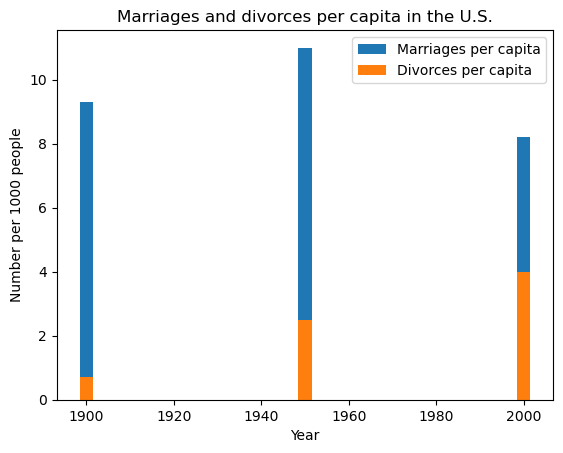

In [14]:
import matplotlib.pyplot as plt

# Data
years = [1900, 1950, 2000]
marriages_per_capita = [9.3, 11.0, 8.2]
divorces_per_capita = [0.7, 2.5, 4.0]

# Creating the figure and axis objects
fig, ax = plt.subplots()

# Creating the bar plots
ax.bar(years, marriages_per_capita, width=3, label='Marriages per capita')
ax.bar(years, divorces_per_capita, width=3, label='Divorces per capita')

# Setting the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number per 1000 people')
ax.set_title('Marriages and divorces per capita in the U.S.')
ax.legend()

# Displaying the chart
plt.show()


In [ ]:
QUESTION 8

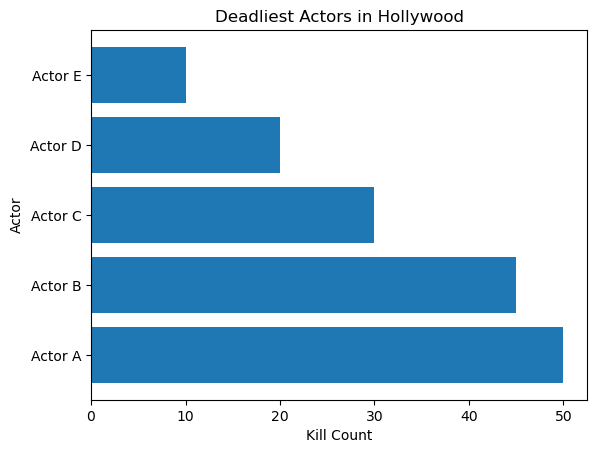

In [15]:
import matplotlib.pyplot as plt

# Data
actors = ['Actor A', 'Actor B', 'Actor C', 'Actor D', 'Actor E']
kill_count = [50, 45, 30, 20, 10]

# Sort the data in descending order
actors = [actor for _, actor in sorted(zip(kill_count, actors), reverse=True)]
kill_count = sorted(kill_count, reverse=True)

# Creating the figure and axis objects
fig, ax = plt.subplots()

# Creating the horizontal bar plot
ax.barh(actors, kill_count)

# Setting the labels and title
ax.set_xlabel('Kill Count')
ax.set_ylabel('Actor')
ax.set_title('Deadliest Actors in Hollywood')

# Displaying the chart
plt.show()


In [ ]:
QUESTION 9

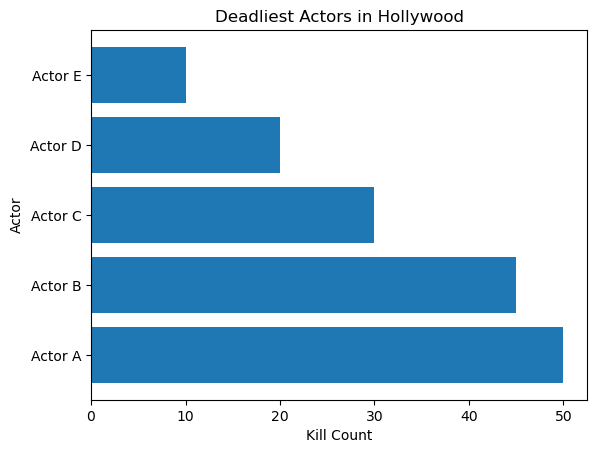

In [16]:
import matplotlib.pyplot as plt

# Data
actors = ['Actor A', 'Actor B', 'Actor C', 'Actor D', 'Actor E']
kill_count = [50, 45, 30, 20, 10]

# Sort the data in descending order
actors = [actor for _, actor in sorted(zip(kill_count, actors), reverse=True)]
kill_count = sorted(kill_count, reverse=True)

# Creating the figure and axis objects
fig, ax = plt.subplots()

# Creating the horizontal bar plot
ax.barh(actors, kill_count)

# Setting the labels and title
ax.set_xlabel('Kill Count')
ax.set_ylabel('Actor')
ax.set_title('Deadliest Actors in Hollywood')

# Displaying the chart
plt.show()


In [ ]:
QUESTION 10

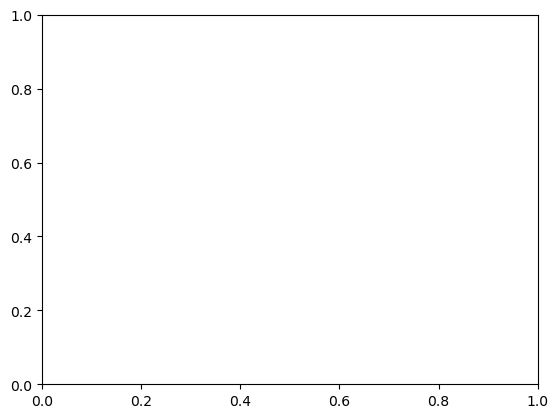

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data
revenue = [100000, 200000, 300000, 400000, 500000]
cs_phds = [10, 20, 30, 40, 50]
years = [2000, 2001, 2002, 2003, 2004]

# Creating the figure and axis objects
fig, ax = plt.subplots()